# Отчет о проделанной работе
1. Прямое вычисление сложности по радемахеру (RC) для LR кажется затруднительным, потому что регуляризация относится к функции риска целиком, а не к функции потерь на элементах выборки. Также невозможно применение данного ниже определения RС, поскольку емкость множества функций никак не учитывает регуляризацию функции риска. Однако RC может быть оценена снизу согласно теореме о связи ошибки обобщаемости, эмпирической ошибки (риска) и RC.
2. Для этого разобъем общую выборку на две части, обучим на второй и вычислим на ней эмпирический риск (ошибку). Предположим, что данное решение аппроксимирует ошибку обобщения на первой части. Их разница будет удвоенной оценкой RC.
3. Загрузка данных, масштабирование, введение классов -1,1 - в ячейках 54,57,82. В ячейке 131 - функция потерь (эмпирического риска) Loss.
4. В ячейке 136 - главный цикл. Случайное разбиение выборки на две подвыборки - S1 - тестовая выборка и S2 - учебная.
5. Модель с гиперпараметром С обучается на выборке S2 - X_train, y_train.
6. Вычисляется эмпирическая ошибка (риск, общие потери) на S2.
7. Вычисляется примерная ошибка обобщения (риск, общие потери) на S1 - X_test, y_test.
8. Вычисляетcя RC для С.
9. Результирующий график - в ячейке 143. Используется логарифмическое масштабирование по обеим осям.

# Выводы

Результаты выглядят довольно правдоподобно. С увеличением гиперпараметра C уменьшается влияние регуляризации и возрастает влияние параметров логистической регрессии, сложность RC, а также ошибка на тестовой выборке. График демонстрирует линейную связь между параметром регуляризации L2 и сложностью Радемахера RC.


# Задание

Используя определение, оценить сложность по радемахеру 
для логистической регресии на breast cancer dataset из 
scikit-learn (бинарная классификация). Подробнее в материалах лекции и на вики.

Построить график зависимости сложности по радемахеру от коэф L2 
регуляризации для alpha=np.logspace(-2,2,5).

Для каждой точки выполнить 100 экспериментов, 
на графике отобразить стандартное отклонение оценки в каждой точке.
Не забудьте предварительно применить к признакам standard scaling.



# Формулы
$ Loss = \min_{ \, \omega, c} \frac{1}{2} \omega^T \omega \, + \, C \sum_{i=1}^n \log(\exp(-y_i (X_i^T \omega + c)) + 1) $

$ z_i = \omega x_i + c $

$ h(x_i) = \frac{1}{1 + \exp(-z_i)} $




# Определение

# Rademacher complexity

Suppose now that the labels $y_i$ are chosen at random without regard to the $x_i$. In other words, suppose we replace each $y_i$ by a random variable $\sigma_i$ that is -1 or +1 with equal probability, independent of everything else. Thus, the $\sigma_i$ represent labels that are pure noise. We can measure how well the space $H$ can fit this noise in expectation $E_{\sigma} [\max_{h \in H} \frac 1 m \sum _{i=1}^m \sigma_i h(x_i)]$, which is called Rademacher complexity.

In [80]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

SEED=42

In [1]:
from sklearn.datasets import load_breast_cancer

In [54]:
data = load_breast_cancer()
y = data.target

In [55]:
print(data.target_names)
print(data.target.shape)
print(data.data.shape)
print(y[:20])
alpha=np.logspace(-2,2,5)
print(alpha)

['malignant' 'benign']
(569,)
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [82]:
y[y==0] = -1
print(y[:20])

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1]


In [83]:
a = data.data[:, 1]
print(a[:20])
print(np.mean(a))
print(np.std(a))


[10.38 17.77 21.25 20.38 14.34 15.7  19.98 20.83 21.82 24.04 23.24 17.89
 24.8  23.95 22.61 27.54 20.13 20.68 22.15 14.36]
19.289648506151142
4.297254637090421


In [57]:
scaler = StandardScaler()
X = scaler.fit_transform(data.data)

In [84]:
a = X[:, 1]
print(a[:20])
print(np.mean(a))
print(np.std(a))

[-2.07333501 -0.35363241  0.45618695  0.25373211 -1.15181643 -0.8353353
  0.16064943  0.35845013  0.58882978  1.10543868  0.91927331 -0.3257076
  1.28229578  1.08449508  0.77266808  1.91991217  0.19555543  0.32354413
  0.66562299 -1.1471623 ]
-6.5684618455151616e-15
1.0000000000000002


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

In [85]:
C = 1
logreg = LogisticRegression(C=C).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.986
Правильность на тестовом наборе: 0.979


In [99]:
C = 100
logreg = LogisticRegression(C=C).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.995
Правильность на тестовом наборе: 0.958


In [100]:
C = 0.01
logreg = LogisticRegression(C=C).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.965
Правильность на тестовом наборе: 0.979


In [88]:
print(logreg.coef_)
print(logreg.intercept_)

[[-0.20281331 -0.17412899 -0.20146812 -0.19904442 -0.09227407 -0.08884559
  -0.16690077 -0.21853512 -0.0653056   0.06925087 -0.17509749  0.00087748
  -0.14561898 -0.15708155  0.00465857  0.02817297  0.02071811 -0.04587342
   0.02172166  0.0781341  -0.23314274 -0.21035592 -0.22278638 -0.21696288
  -0.16056587 -0.12513169 -0.17113471 -0.2241984  -0.17052226 -0.060754  ]]
[0.17446343]


In [115]:
def model(x):
    return 1 / (1 + np.exp(-x))

w = logreg.coef_
c = logreg.intercept_

z = np.dot(X_test, w.T) + c
y_prob = model(z).ravel()

pred = np.ones(y_test.shape)
pred[y_prob < 0.5] = -1
#print(pred)
#print(y_test)
accuracy_score(y_test, pred)

0.9790209790209791

In [131]:
def Loss(C, X1, y1):
    w = logreg.coef_
    c = logreg.intercept_
    z = np.dot(X1, w.T) + c

    reg = np.dot(w, w.T).ravel()
    loss = np.log( 1 + np.exp( - z.ravel() * y1 ) )
    return reg + C * np.sum(loss)

In [133]:
print('C=', C)
print('L_S2=', Loss(C, X_train, y_train))
print('L_S1=', Loss(C, X_test, y_test))

C= 100.0
L_S2= [5870.28841793]
L_S1= [6352.72539424]


In [120]:
# Разбиение на две части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

In [121]:
logreg = LogisticRegression(C=C).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.975
Правильность на тестовом наборе: 0.947


In [136]:
#

N = 100
RR = []
xx = []
yy = []
yy_std = []

for C in alpha:
    xx.append(C)
    for i in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size=0.5, stratify=y)
        logreg = LogisticRegression(C=C).fit(X_train, y_train)
        
        L_S2 = Loss(C, X_train, y_train)
        L_S1 = Loss(C, X_test, y_test)
        RC = 2 * np.abs(L_S1 - L_S2)
        RR.append(RC)
        print(C, i, L_S2, L_S1, RC)
        
    yy.append(np.mean(RR))
    yy_std.append(np.std(RR))
        
        

0.01 0 [1.12663831] [1.0695563] [0.11416402]
0.01 1 [1.09091338] [1.1394983] [0.09716984]
0.01 2 [1.13533704] [1.07637929] [0.11791551]
0.01 3 [1.14103023] [1.09380112] [0.09445822]
0.01 4 [1.11702473] [1.09789953] [0.03825041]
0.01 5 [1.12108061] [1.10719751] [0.02776621]
0.01 6 [1.15564102] [1.07343451] [0.16441302]
0.01 7 [1.10469582] [1.10710807] [0.0048245]
0.01 8 [1.12380142] [1.09127813] [0.06504658]
0.01 9 [1.17324005] [1.0500199] [0.24644029]
0.01 10 [1.12032167] [1.10625439] [0.02813457]
0.01 11 [1.10194051] [1.09965492] [0.00457119]
0.01 12 [1.12622228] [1.09493552] [0.06257352]
0.01 13 [1.11146264] [1.1173328] [0.01174033]
0.01 14 [1.13440086] [1.07991892] [0.10896388]
0.01 15 [1.13502589] [1.09588315] [0.07828549]
0.01 16 [1.14807188] [1.06290356] [0.17033664]
0.01 17 [1.10534957] [1.12200952] [0.0333199]
0.01 18 [1.04198708] [1.15827872] [0.23258327]
0.01 19 [1.08819314] [1.13664065] [0.09689501]
0.01 20 [1.08397158] [1.15760051] [0.14725786]
0.01 21 [1.14269677] [1.08038

In [139]:
print(xx)
print(yy)
print(yy_std)

[0.01, 0.1, 1.0, 10.0, 100.0]
[0.08914332466214812, 0.6390772846887603, 6.796649907237356, 135.10896766481955, 2943.831935741286]
[0.07184433558053493, 0.8192393225731969, 11.01223148176674, 256.04531883137344, 6155.691145643176]


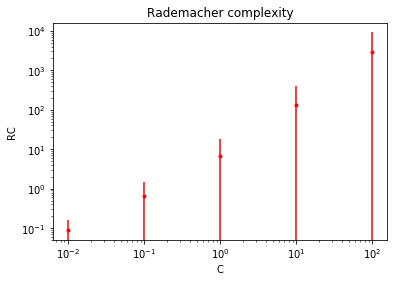

In [143]:
plt.xlabel('C')
plt.ylabel('RC')
plt.title('Rademacher complexity')
plt.yscale('log')
plt.xscale('log')
plt.errorbar(xx, yy, yerr=yy_std, fmt='.r');